In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
pokemon_data = pd.read_csv('pokemon.csv')
abilities_data = pd.read_csv('abilities.csv')
egg_group_data = pd.read_csv('egg_groups.csv')

In [3]:
pokemon_data.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


In [4]:
abilities_data.head()

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id
0,1,stench,Stench,あくしゅう,Stench,3,4
1,2,drizzle,Drizzle,あめふらし,Rainfall,3,11
2,3,speed-boost,Speed Boost,かそく,Acceleration,3,23
3,4,battle-armor,Battle Armor,カブトアーマー,Kabuto Armor,3,6
4,5,sturdy,Sturdy,がんじょう,Sturdy,3,6


In [5]:
egg_group_data.head()

,id,identifier,name,name_jp,list_order,legacy_id
0,1,monster,Monster,かいじゅう,2,9
1,2,water-1,Water 1,すいちゅう１,8,11
2,3,bug,Bug,むし,3,1
3,4,flying,Flying,ひこう,4,4
4,5,ground,Ground,りくじょう,5,5


In [6]:
pokemon_data = pokemon_data.replace('NaN',0) # заменяем прощенные значения 0  
fig = 1

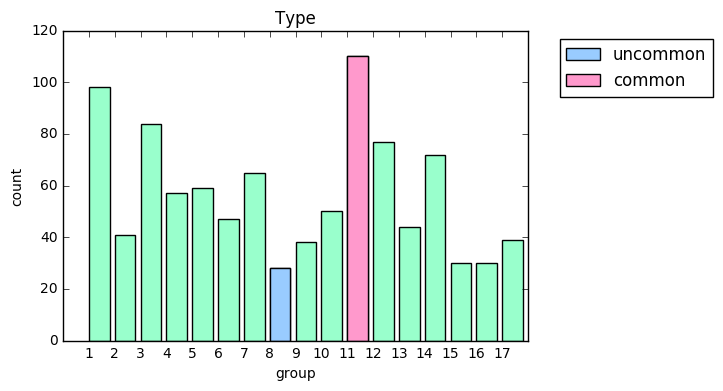

In [7]:
# Сгруппируем покемонов по типам, найдем часто встречающиеся и редко встречающиеся типы 
type1_dict = pokemon_data.groupby(pokemon_data['type1_id']).size().to_dict()
type2_dict = pokemon_data.groupby(pokemon_data['type2_id']).size().to_dict()
for k in type1_dict.iterkeys():
    if k in type2_dict.iterkeys():
         type1_dict[k] += type2_dict[k]
plt.figure(fig)
fig += 1
plt.bar(type1_dict.keys(), type1_dict.values(), color = '#99FFCC')
plt.bar(min(type1_dict, key=type1_dict.get), type1_dict[min(type1_dict, key=type1_dict.get)], color = '#99CCFF', label = 'uncommon')
plt.bar(max(type1_dict, key=type1_dict.get), type1_dict[max(type1_dict, key=type1_dict.get)], color = '#FF99CC',label = 'common')
plt.title('Type')
plt.xlabel('group')
plt.ylabel('count')
plt.xticks(type1_dict.keys())
plt.legend(loc = 2, bbox_to_anchor = (1.05, 1)) 
plt.show()

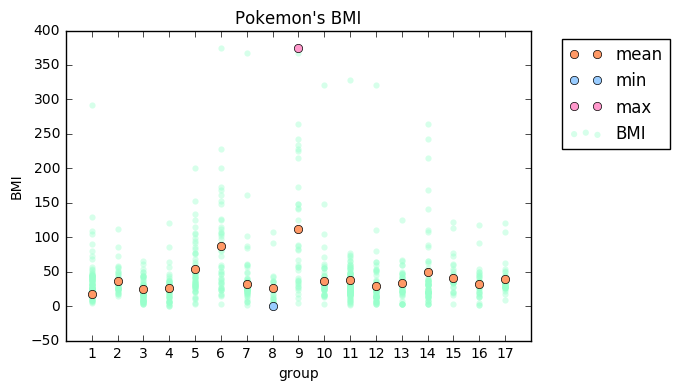

In [8]:
# Посчитаем ИМТ покемонов (предположим, что формула для расчета ИМТ человека применима к покемонам)
pokemon_data['BMI'] = pokemon_data['weight']*10./pokemon_data['height'] ** 2
type1_dict = pokemon_data.groupby(pokemon_data['type1_id'])['BMI'].mean().to_dict()
type2_dict = pokemon_data.groupby(pokemon_data['type2_id'])['BMI'].mean().to_dict()
for k in type1_dict.iterkeys():
    if k in type2_dict.iterkeys():
         type1_dict[k] += type2_dict[k]
plt.figure(fig)  
fig += 1
plt.scatter(pokemon_data['type1_id'], pokemon_data['BMI'], color = '#99FFCC', alpha = 0.4, lw = 0, label = None )
plt.scatter(pokemon_data['type2_id'][pokemon_data['type2_id']<>0], pokemon_data['BMI'][pokemon_data['type2_id']<>0], color = '#99FFCC', alpha = 0.4, lw = 0 )
plt.plot(type1_dict.keys(), [v/2 for v in type1_dict.values()], 'o', color='#FF9966', label = 'mean')
min_y = [min(pokemon_data['BMI'])]*len(pokemon_data['type1_id'][pokemon_data['BMI'] == min(pokemon_data['BMI'])])
min_x = pokemon_data['type1_id'][pokemon_data['BMI'] == min(pokemon_data['BMI'])]
max_y = [max(pokemon_data['BMI'])]*len(pokemon_data['type1_id'][pokemon_data['BMI'] == max(pokemon_data['BMI'])])
max_x = pokemon_data['type1_id'][pokemon_data['BMI'] == max(pokemon_data['BMI'])]
plt.plot(min_x, min_y, 'o', color = '#99CCFF', label = 'min')
plt.plot(max_x, max_y, 'o', color = '#FF99CC',label = 'max')
plt.title("Pokemon's BMI")
plt.xlabel('group')
plt.ylabel('BMI')
plt.xticks(type1_dict.keys())
plt.legend(loc = 2, bbox_to_anchor = (1.05, 1)) 
plt.show()

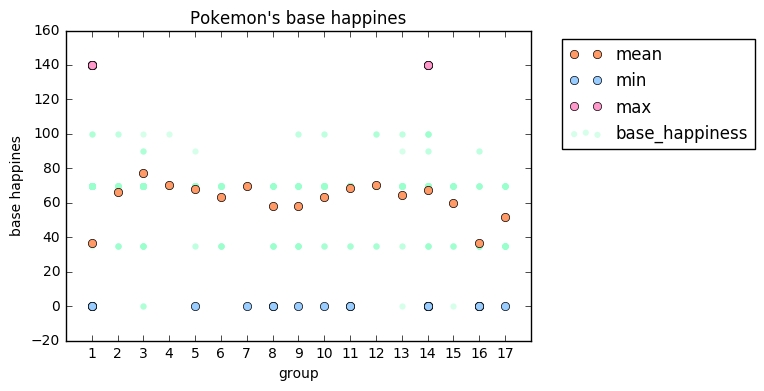

In [9]:
# Посчитаем base_happines для каждой группы
type1_dict = pokemon_data.groupby(pokemon_data['type1_id'])['base_happiness'].mean().to_dict()
type2_dict = pokemon_data.groupby(pokemon_data['type2_id'])['base_happiness'].mean().to_dict()
for k in type1_dict.iterkeys():
    if k in type2_dict.iterkeys():
         type1_dict[k] += type2_dict[k]
plt.figure(fig)  
fig += 1
plt.scatter(pokemon_data['type1_id'], pokemon_data['base_happiness'], color = '#99FFCC', alpha = 0.4, lw = 0, label = None  )
plt.scatter(pokemon_data['type2_id'][pokemon_data['type2_id']<>0], pokemon_data['base_happiness'][pokemon_data['type2_id']<>0], color = '#99FFCC', alpha = 0.4, lw = 0 )
plt.plot(type1_dict.keys(), [v/2 for v in type1_dict.values()], 'o', color='#FF9966', label = 'mean')
min_y = [min(pokemon_data['base_happiness'])]*len(pokemon_data['type1_id'][pokemon_data['base_happiness'] == min(pokemon_data['base_happiness'])])
min_x = pokemon_data['type1_id'][pokemon_data['base_happiness'] == min(pokemon_data['base_happiness'])]
max_y = [max(pokemon_data['base_happiness'])]*len(pokemon_data['type1_id'][pokemon_data['base_happiness'] == max(pokemon_data['base_happiness'])])
max_x = pokemon_data['type1_id'][pokemon_data['base_happiness'] == max(pokemon_data['base_happiness'])]
plt.plot(min_x, min_y, 'o', color = '#99CCFF', label = 'min')
plt.plot(max_x, max_y, 'o', color = '#FF99CC',label = 'max')
plt.title("Pokemon's base happines")
plt.xlabel('group')
plt.ylabel('base happines')
plt.xticks(type1_dict.keys())
plt.legend(loc = 2, bbox_to_anchor = (1.05, 1)) 
plt.show()

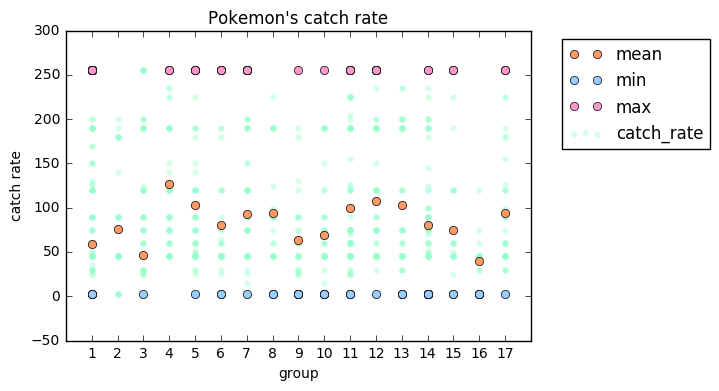

In [10]:
# Посчитаем catch_rate для каждой группы
type1_dict = pokemon_data.groupby(pokemon_data['type1_id'])['catch_rate'].mean().to_dict()
type2_dict = pokemon_data.groupby(pokemon_data['type2_id'])['catch_rate'].mean().to_dict()
for k in type1_dict.iterkeys():
    if k in type2_dict.iterkeys():
         type1_dict[k] += type2_dict[k]
plt.figure(fig)   
fig += 1
plt.scatter(pokemon_data['type1_id'], pokemon_data['catch_rate'], color = '#99FFCC', alpha = 0.4, lw = 0, label = None  )
plt.scatter(pokemon_data['type2_id'][pokemon_data['type2_id']<>0], pokemon_data['catch_rate'][pokemon_data['type2_id']<>0], color = '#99FFCC', alpha = 0.4, lw = 0 )
plt.plot(type1_dict.keys(), [v/2 for v in type1_dict.values()], 'o', color='#FF9966', label = 'mean')
min_y = [min(pokemon_data['catch_rate'])]*len(pokemon_data['type1_id'][pokemon_data['catch_rate'] == min(pokemon_data['catch_rate'])])
min_x = pokemon_data['type1_id'][pokemon_data['catch_rate'] == min(pokemon_data['catch_rate'])]
max_y = [max(pokemon_data['catch_rate'])]*len(pokemon_data['type1_id'][pokemon_data['catch_rate'] == max(pokemon_data['catch_rate'])])
max_x = pokemon_data['type1_id'][pokemon_data['catch_rate'] == max(pokemon_data['catch_rate'])]
plt.plot(min_x, min_y, 'o', color = '#99CCFF', label = 'min')
plt.plot(max_x, max_y, 'o', color = '#FF99CC',label = 'max')
plt.title("Pokemon's catch rate")
plt.xlabel('group')
plt.ylabel('catch rate')
plt.xticks(type1_dict.keys())
plt.legend(loc = 2, bbox_to_anchor = (1.05, 1)) 
plt.show()

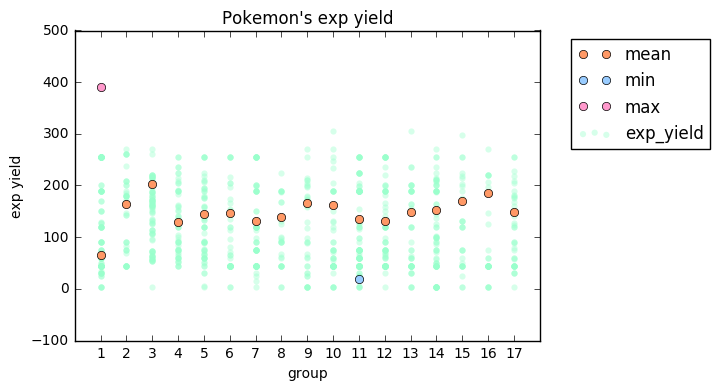

In [11]:
# Посчитаем exp_yield для каждой группы
type1_dict = pokemon_data.groupby(pokemon_data['type1_id'])['exp_yield'].mean().to_dict()
type2_dict = pokemon_data.groupby(pokemon_data['type2_id'])['exp_yield'].mean().to_dict()
for k in type1_dict.iterkeys():
    if k in type2_dict.iterkeys():
         type1_dict[k] += type2_dict[k]
plt.figure(fig)
fig += 1    
plt.scatter(pokemon_data['type1_id'], pokemon_data['catch_rate'], color = '#99FFCC', alpha = 0.4, lw = 0, label = None  )
plt.scatter(pokemon_data['type2_id'][pokemon_data['type2_id']<>0], pokemon_data['exp_yield'][pokemon_data['type2_id']<>0], color = '#99FFCC', alpha = 0.4, lw = 0 )
plt.plot(type1_dict.keys(), [v/2 for v in type1_dict.values()], 'o', color='#FF9966', label = 'mean')
min_y = [min(pokemon_data['exp_yield'])]*len(pokemon_data['type1_id'][pokemon_data['exp_yield'] == min(pokemon_data['exp_yield'])])
min_x = pokemon_data['type1_id'][pokemon_data['exp_yield'] == min(pokemon_data['exp_yield'])]
max_y = [max(pokemon_data['exp_yield'])]*len(pokemon_data['type1_id'][pokemon_data['exp_yield'] == max(pokemon_data['exp_yield'])])
max_x = pokemon_data['type1_id'][pokemon_data['exp_yield'] == max(pokemon_data['exp_yield'])]
plt.plot(min_x, min_y, 'o', color = '#99CCFF', label = 'min')
plt.plot(max_x, max_y, 'o', color = '#FF99CC',label = 'max')
plt.title("Pokemon's exp yield")
plt.xlabel('group')
plt.ylabel('exp yield')
plt.xticks(type1_dict.keys())
plt.legend(loc = 2, bbox_to_anchor = (1.05, 1))
plt.show()